In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load in google's mobility data
# mobility data source: Google LLC "Google COVID-19 Community Mobility Reports".
# https://www.google.com/covid19/mobility/ Accessed: 6/12/2020.
data = "https://raw.githubusercontent.com/ehuang13/w209_final/master/Global_Mobility_Report.csv"
mobility_df = pd.read_csv(data, low_memory = False)

In [4]:
# check out the data
mobility_df.sample(10)

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
332759,US,United States,Minnesota,Fillmore County,NaN,27045.0,2020-04-25,NaN,NaN,NaN,NaN,-15.0,NaN
448679,US,United States,Texas,Crosby County,NaN,48107.0,2020-04-01,NaN,NaN,NaN,NaN,-37.0,NaN
423464,US,United States,Pennsylvania,Susquehanna County,NaN,42115.0,2020-04-06,NaN,NaN,NaN,-15.0,-39.0,NaN
505738,UY,Uruguay,Montevideo Department,NaN,UY-MO,NaN,2020-04-15,-52.0,-21.0,-63.0,-40.0,-41.0,21.0
363920,US,United States,Nebraska,Hamilton County,NaN,31081.0,2020-03-25,NaN,NaN,NaN,15.0,-29.0,NaN
200553,US,United States,Alabama,Bibb County,NaN,1007.0,2020-05-18,NaN,NaN,NaN,NaN,-24.0,NaN
474582,US,United States,Virginia,Dickenson County,NaN,51051.0,2020-03-29,NaN,-11.0,NaN,NaN,NaN,NaN
260748,US,United States,Illinois,Clay County,NaN,17025.0,2020-03-02,3.0,NaN,NaN,NaN,1.0,NaN
493061,US,United States,West Virginia,Putnam County,NaN,54079.0,2020-04-26,-28.0,-12.0,NaN,-11.0,-42.0,NaN
411706,US,United States,Oklahoma,Pontotoc County,NaN,40123.0,2020-05-07,2.0,7.0,NaN,NaN,-36.0,11.0


### Simple EDA

In [5]:
print("Mobility data dimensions: {}".format(mobility_df.shape))

Mobility data dimensions: (516697, 13)


In [6]:
mobility_df.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [7]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
country_region_code                                   515810 non-null object
country_region                                        516697 non-null object
sub_region_1                                          501307 non-null object
sub_region_2                                          298720 non-null object
iso_3166_2_code                                       187299 non-null object
census_fips_code                                      298834 non-null float64
date                                                  516697 non-null object
retail_and_recreation_percent_change_from_baseline    400610 non-null float64
grocery_and_pharmacy_percent_change_from_baseline     385086 non-null float64
parks_percent_change_from_baseline                    238643 non-null float64
transit_stations_percent_change_from_baseline         275427 non-null float64
workplaces_percent_change_from_baseli

In [8]:
mobility_df.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,298834.000000,400610.000000,385086.000000,238643.000000,275427.000000,503228.000000,284348.000000
mean,30341.084840,-23.909084,-6.876116,-5.895145,-28.052304,-24.191545,10.976437
std,15299.099769,29.054157,21.812352,47.914222,30.077850,21.692744,9.470850
min,1001.000000,-100.000000,-100.000000,-100.000000,-100.000000,-94.000000,-25.000000
25%,18111.000000,-44.000000,-17.000000,-38.000000,-52.000000,-39.000000,2.000000
50%,29101.000000,-21.000000,-3.000000,-9.000000,-26.000000,-26.000000,11.000000
75%,45059.000000,0.000000,6.000000,15.000000,-3.000000,-4.000000,17.000000
max,56045.000000,313.000000,337.000000,616.000000,497.000000,248.000000,56.000000


In [9]:
# quite a lot of null values...
mobility_df.isnull().sum()

country_region_code                                      887
country_region                                             0
sub_region_1                                           15390
sub_region_2                                          217977
iso_3166_2_code                                       329398
census_fips_code                                      217863
date                                                       0
retail_and_recreation_percent_change_from_baseline    116087
grocery_and_pharmacy_percent_change_from_baseline     131611
parks_percent_change_from_baseline                    278054
transit_stations_percent_change_from_baseline         241270
workplaces_percent_change_from_baseline                13469
residential_percent_change_from_baseline              232349
dtype: int64

In [10]:
# see top 10 countries with most data
mobility_df.groupby(["country_region"]).count().sort_values(by="country_region_code",ascending=False).head(10)

,country_region_code,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region,,,,,,,,,,,,
United States,304648,304534,298720,5814,298834,304648,219426,207167,77356,119088,293793,138947
United Kingdom,17260,17146,0,16253,0,17260,16844,17031,13367,16769,17225,13323
Turkey,9339,9225,0,9225,0,9339,8701,8561,7918,7226,9339,7364
Puerto Rico,7646,7532,0,0,0,7646,5074,5207,1776,564,7296,854
Vietnam,7296,7182,0,7182,0,7296,7295,7060,7254,6768,7296,7112
Slovenia,5633,5519,0,0,0,5633,3007,2669,513,1139,5244,688
Japan,5472,5358,0,5358,0,5472,5472,5472,5472,5472,5472,5472
Romania,4902,4788,0,4788,0,4902,4896,4902,4901,4865,4902,4634
Nigeria,4332,4218,0,4218,0,4332,3300,3268,2619,2428,4332,2585


### Deep dive into US mobility data

In [60]:
# filter mobility_df to united states
us = mobility_df["country_region"] == "United States"
us_df = mobility_df[us]

In [61]:
# rename columns
usCols = ['country_region_code', 'country_region', 'state', 'county', 'iso_3166_2_code', 'census_fips_code', 'date',
          'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
us_df.columns = usCols

In [62]:
us_df.sample(5)

,country_region_code,country_region,state,county,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
452993,US,United States,Texas,Harrison County,NaN,48203.0,2020-04-08,-26.0,-1.0,-18.0,NaN,-37.0,13.0
213126,US,United States,Arkansas,Garland County,NaN,5051.0,2020-02-26,18.0,5.0,14.0,NaN,3.0,-1.0
477627,US,United States,Virginia,Hopewell,NaN,51670.0,2020-06-07,-6.0,8.0,NaN,NaN,-13.0,NaN
393483,US,United States,North Carolina,Yancey County,NaN,37199.0,2020-03-30,-28.0,-9.0,NaN,NaN,-29.0,NaN
336790,US,United States,Minnesota,Renville County,NaN,27129.0,2020-02-25,16.0,NaN,NaN,NaN,0.0,NaN


Mobility data by States

In [20]:
# which states has most mobility data
state_df = us_df.groupby(["state"], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

#rename columns
state_df.columns = ["state", "mobility_counts"]
state_df.head()

,state,mobility_counts
43,Texas,22880
10,Georgia,16027
46,Virginia,14248
17,Kentucky,11259
33,North Carolina,11047


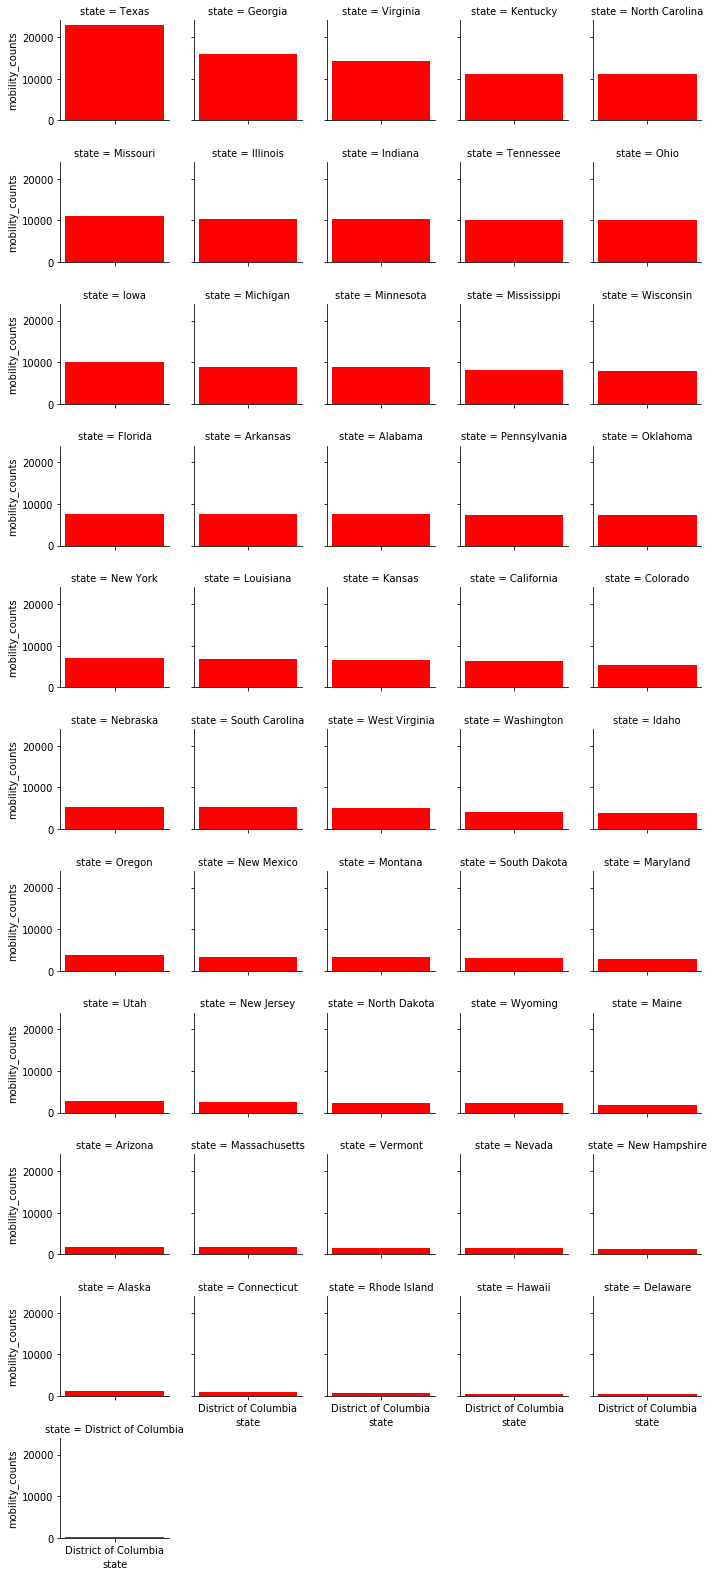

In [21]:
g = sns.FacetGrid(state_df, col="state", col_wrap=5, height=2)
g = g.map(plt.bar, "state", "mobility_counts", color="r")

Mobility data by locations

In [22]:
# group by locations to see which locations have the most mobility data
location_df = us_df.groupby(["country_region"]).count()
# location_df = us_df.groupby(['retail_and_recreation',
#        'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
#        'residential'], as_index=False)["country_region_code"].count().sort_values(by="country_region_code",ascending=False)

# transpose dataframe 
location_df = location_df.transpose()

# selection locations by count of data
location_df = location_df.loc[["retail_and_recreation", "grocery_and_pharmacy", "parks", "transit_stations", "workplaces", "residential"]].reset_index()

# rename columns
location_df.columns = ["location", "mobility_count"]

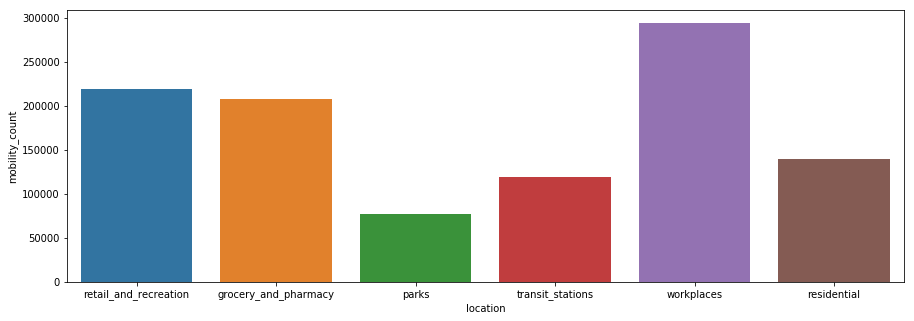

In [23]:
# plot location_df to see mobility data by location
plt.figure(figsize=(15,5))
ax = sns.barplot(x="location", y="mobility_count", 
                 data=location_df)

Calculate Average Change Across Different Locations

In [63]:
average_cols = list(us_df[['retail_and_recreation',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential']].mean(axis=1))

In [65]:
us_df["avg_change"] = average_cols

C:\Users\ehuang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
us_df.sample(5)

,country_region_code,country_region,state,county,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,avg_change
284476,US,United States,Iowa,Hancock County,NaN,19081.0,2020-04-08,NaN,NaN,NaN,NaN,-36.0,NaN,-36.000000
397672,US,United States,Ohio,Coshocton County,NaN,39031.0,2020-03-01,22.0,12.0,NaN,NaN,4.0,NaN,12.666667
472102,US,United States,Virginia,Augusta County,NaN,51015.0,2020-04-10,-43.0,-6.0,NaN,13.0,-44.0,20.0,-12.000000
328469,US,United States,Michigan,Ogemaw County,NaN,26129.0,2020-06-06,21.0,NaN,NaN,NaN,4.0,NaN,12.500000
334101,US,United States,Minnesota,Lac qui Parle County,NaN,27073.0,2020-03-18,NaN,NaN,NaN,NaN,-16.0,NaN,-16.000000


In [70]:
# confirm type for location columns
us_df[['retail_and_recreation',
       'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces',
       'residential',"avg_change"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304648 entries, 199890 to 504537
Data columns (total 7 columns):
retail_and_recreation    219426 non-null float64
grocery_and_pharmacy     207167 non-null float64
parks                    77356 non-null float64
transit_stations         119088 non-null float64
workplaces               293793 non-null float64
residential              138947 non-null float64
avg_change               304648 non-null float64
dtypes: float64(7)
memory usage: 18.6 MB


### Export US Mobility Data to CSV File For Tableau Work

In [71]:
us_df.to_csv("US_Mobility_Report.csv")